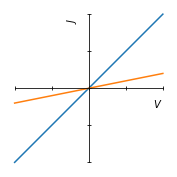

In [129]:
# Ohmic
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import os

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1, 1, 1)

volts = np.linspace(-1, 1, 1000)

R1 = 1;
R2 = 5;
def OhmicI(V, R):
    return V / R

ax.plot(volts, OhmicI(volts, R1));
ax.plot(volts, OhmicI(volts, R2));

ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(direction='inout')

l=50
plt.xlabel(' '*l + '$\it{V}$', fontname="Arial", fontsize=10)
plt.ylabel(' '*l + '$\it{J}$', fontname="Arial", fontsize=10)

ax.set_aspect(1.0/ax.get_data_ratio())

fig.savefig("Ohmic" +'.svg', format='svg', transparent=True, bbox_inches='tight',pad_inches=0)

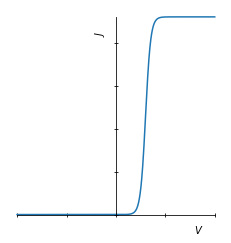

In [130]:
# SchottkyDiode no resistor
kB = 1.38064852 * 10**-23 # J/K 
q = 1.60217662 * 10**-19 # C
T = 300; # K
A = 117; # A/(K^2*cm^2)
Φ1 = .5; # V 
Φ2 = .2; # V

def J0(Φ):
    return A*(T**2)*np.exp(-q*Φ/(kB*T));

J01 = J0(Φ1)
J02 = J0(Φ2)

def SchottkyDiode(V):
    inner = q*V/(2*kB*T)
    return (2*J01*J02*np.sinh(inner) /
               (J01*np.exp(inner) + J02*np.exp(-inner)) )

fig = plt.figure()
ax = plt.axes()

volts = np.linspace(-1, 1, 1000)
ax.plot(volts, SchottkyDiode(volts));

ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(direction='inout')

l=60
plt.xlabel(' '*l + '$\it{V}$', fontname="Arial", fontsize=10)
plt.ylabel(' '*l + '$\it{J}$', fontname="Arial", fontsize=10)

ax.set_aspect(1.0/ax.get_data_ratio())
fig.savefig("SchottkyDiode" +'.svg', format='svg', transparent=True, bbox_inches='tight',pad_inches=0)

In [156]:
# MScM Setup
import scipy.optimize as opt
import sys

kB = 1.38064852 * 10**-23 # J/K 
q = 1.60217662 * 10**-19 # C
T = 300; # K
A = 117; # A/(K^2*cm^2)
A = .0114
#Φ1 = .5; # V 
#Φ2 = .2; # V
n1 = 1; n2 = 1; # unitless
#R = 1000.00; #Ohms
SArea = (10 * 10**-9)**2; # 10nm by 10nm
SArea = .01; #m?


def J0(Φ):
    return A*(T**2)*np.exp(-q*Φ/(kB*T))

def V_MScM(Φ1, Φ2, n1, n2, R, J):
    J01 = J0(Φ1)
    J02 = J0(Φ2)
    if (J/J01+1 <= 0.) or (-J/J02+1 <= 0.):
        return 10.**100
    return (  (n1*kB*T/q)*np.log(J/J01+1) 
            - (n2*kB*T/q)*np.log(-J/J02+1) 
            + R*SArea*J)

length = 100
volts = np.sort(np.concatenate((np.linspace(-1., 1., length), np.linspace(-1./length, 1./length, length))))

def J_MScM(Φ1, Φ2, n1, n2, R):
    Js = np.empty(np.size(volts))
    guess = SchottkyDiode(volts[0])

    for i, volt in enumerate(volts):
        func = lambda current : np.abs(V_MScM(Φ1, Φ2, n1, n2, R, current) - volt)
        J = opt.minimize_scalar(func, method='Golden', tol=10.**-20)
        guess = J.x+1
        Js[i] = J.x
    return Js


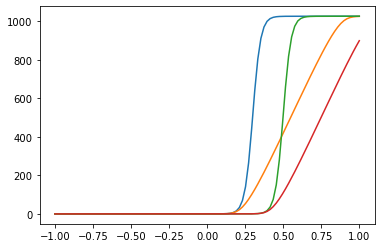

In [179]:
# SchottkyDiode calculation
n1 = 1; n2 = 1; # unitless

SDJs1 = J_MScM(Φ1=.3, Φ2=0., n1=1., n2=1., R=0.)
SDJs2 = J_MScM(Φ1=.3, Φ2=0., n1=1., n2=1., R=.05)
SDJs3 = J_MScM(Φ1=.5, Φ2=0., n1=1., n2=1., R=0.)
SDJs4 = J_MScM(Φ1=.5, Φ2=0., n1=1., n2=1., R=.05)

fig = plt.figure()
ax = plt.axes()
ax.plot(volts, SDJs1);
ax.plot(volts, SDJs2);
ax.plot(volts, SDJs3);
ax.plot(volts, SDJs4);

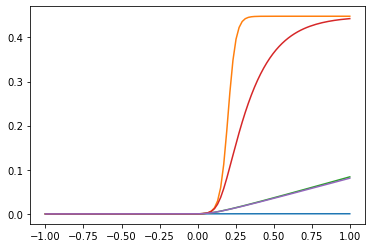

In [175]:
# MScM calculation
Rmscm = 1000
n2mscm = 7.
Φ2mscm = .2
Φ1mscm = .4
MScMJs1 = J_MScM(Φ1=Φ1mscm, Φ2=Φ1mscm, n1=1., n2=n2mscm, R=0) #standard
MScMJs2 = J_MScM(Φ1=Φ1mscm, Φ2=Φ2mscm, n1=1., n2=1., R=0) # Φ2 smaller
MScMJs3 = J_MScM(Φ1=Φ1mscm, Φ2=Φ2mscm, n1=1., n2=1., R=Rmscm) # Φ2 smaller and R larger
MScMJs4 = J_MScM(Φ1=Φ1mscm, Φ2=Φ2mscm, n1=1., n2=n2mscm, R=0) # Φ2 smaller n2 larger
MScMJs5 = J_MScM(Φ1=Φ1mscm, Φ2=Φ2mscm, n1=1., n2=n2mscm, R=Rmscm) # Φ2 smaller n2 larger R larger
MScMJs6 = J_MScM(Φ1=Φ1mscm, Φ2=Φ1mscm, n1=1., n2=1, R=0) #sym n

MScMJss = [MScMJs1, MScMJs2, MScMJs3, MScMJs4, MScMJs5]

fig = plt.figure()
ax = plt.axes()
ax.plot(volts, MScMJs1);
ax.plot(volts, MScMJs2);
ax.plot(volts, MScMJs3);
ax.plot(volts, MScMJs4);
ax.plot(volts, MScMJs5);

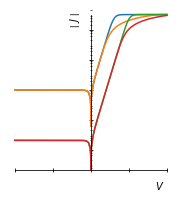

In [182]:
# MScM log plot
fig = plt.figure(figsize=(3,3))
ax = plt.axes()
ax.set_yscale('log')

name = "SchottkyDiode"
ax.plot(volts, np.abs(SDJs1));
ax.plot(volts, np.abs(SDJs2));
ax.plot(volts, np.abs(SDJs3));
ax.plot(volts, np.abs(SDJs4));

#name = "MetalSCMetal"
#for MScMJs in MScMJss:
#    ax.plot(volts, np.abs(MScMJs))
#ax.plot(-volts[np.where( volts < 0 )]  , np.abs(MScMJs1[np.where( volts < 0 )]), 
#    '--', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])

ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('bottom')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
#ax.xaxis.set_ticks_position('bottom')
#ax.yaxis.set_ticks_position('left')

ax.set_xticklabels([])
ax.set_yticklabels([])

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.tick_params(direction='inout', which='both')

(ysc0, ysc1) = ax.get_ylim()
ax.set_ylim((ysc0*10, ysc1))

l=50
plt.xlabel(' '*l + '$\it{V}$', fontname="Arial", fontsize=10)
plt.ylabel(' '*l + '| $\it{J}$ |', fontname="Arial", fontsize=10)

#ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
fig.savefig(name + "_log" +'.svg', format='svg', transparent=True, bbox_inches='tight',pad_inches=0)
plt.show()

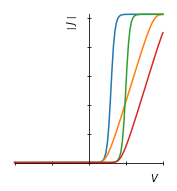

In [181]:
# MScM linear plot
fig = plt.figure(figsize=(3,3))
ax = plt.axes()

name = "SchottkyDiode"
ax.plot(volts, SDJs1);
ax.plot(volts, SDJs2);
ax.plot(volts, SDJs3);
ax.plot(volts, SDJs4);

#name = "MetalSCMetal"
#for MScMJs in MScMJss:
#    ax.plot(volts, MScMJs);

ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(direction='inout')


l=48
plt.xlabel(' '*l + '$\it{V}$', fontname="Arial", fontsize=10)
plt.ylabel(' '*l + '| $\it{J}$ |', fontname="Arial", fontsize=10)

ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
fig.savefig(name + "_linear" +'.svg', format='svg', transparent=True, bbox_inches='tight',pad_inches=.01)

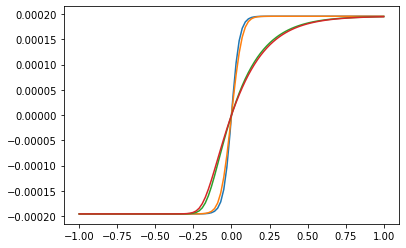

In [124]:
# MScM play
Rmscm = 10000
n2mscm = 7.
Φ2mscm = .2
Φ1mscm = .4
pMScMJs1 = J_MScM(Φ1=Φ1mscm, Φ2=Φ1mscm, n1=1., n2=1., R=0) #standard
pMScMJs2 = J_MScM(Φ1=Φ1mscm, Φ2=Φ1mscm, n1=1., n2=1., R=Rmscm) # R larger
pMScMJs3 = J_MScM(Φ1=Φ1mscm, Φ2=Φ1mscm, n1=1., n2=n2mscm, R=0) #  n2 larger
pMScMJs4 = J_MScM(Φ1=Φ1mscm, Φ2=Φ1mscm, n1=1., n2=n2mscm, R=Rmscm) # n2 larger R larger

fig = plt.figure()
ax = plt.axes()
ax.plot(volts, pMScMJs1);
ax.plot(volts, pMScMJs2);
ax.plot(volts, pMScMJs3);
ax.plot(volts, pMScMJs4);

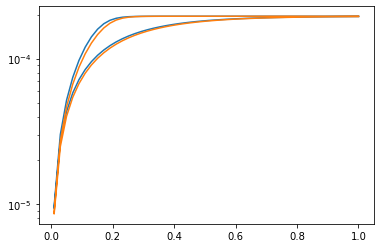

In [121]:
# MScM play
fig = plt.figure()
ax = plt.axes()
ax.set_yscale('log')
#ax.plot(np.abs(volts), np.abs(pMScMJs1));
#ax.plot(np.abs(volts), np.abs(pMScMJs2));
ax.plot(np.abs(volts), np.abs(pMScMJs3));
ax.plot(np.abs(volts), np.abs(pMScMJs4));